# HR

### Introdução

Neste projeto, o DataFrame de Recursos Humanos (RH) passou por várias etapas. Primeiramente, foi feita a padronização de todo o conjunto de dados para o idioma inglês, e, em seguida, ajustado o formato das datas para o padrão em português.

Após a preparação dos dados, foi conduzida uma análise exploratória para obter uma compreensão mais profunda do conjunto de dados. Isso envolveu a exploração das variáveis e a identificação de tendências.

Em seguida, avançou-se para a análise de insights, onde foram formuladas perguntas específicas para extrair informações valiosas sobre o desempenho e o ambiente de trabalho.

### Data Frame
O DataFrame de Recursos Humanos (HR) é um conjunto de dados que contém informações sobre os funcionários de uma organização.<br>
Ele inclui detalhes como nome dos funcionários, departamento, salário, nível de satisfação, engajamento, data de admissão, data de desligamento, pontuação de performance, entre outros atributos relevantes.
<br>
Aqui estão as ações realizadas no DataFrame de Recursos Humanos:

* Classificação de Engajamento: Os dados foram classificados com base na pontuação de engajamento em ordem decrescente, destacando os funcionários mais engajados.

* Seleção dos 10 Melhores Funcionários: Os 10 funcionários com as maiores pontuações de engajamento foram selecionados para análise adicional.

* Preenchimento de Dados Ausentes: Qualquer valor ausente na coluna de data de desligamento foi preenchido com a data atual para garantir consistência nos cálculos.

* Cálculo de Tempo de Empresa: O tempo de serviço de cada funcionário na empresa foi calculado em dias e anos com base nas datas de admissão e desligamento.

* Visualização de Tempo de Serviço: Um gráfico de barras empilhadas foi criado para mostrar o tempo de serviço dos 10 melhores funcionários, desagregado por departamento.

* Personalização do Gráfico: A paleta de cores foi personalizada para representar os departamentos, e rótulos e títulos foram adicionados para tornar o gráfico informativo e esteticamente agradável.

* Essas ações permitiram uma análise mais aprofundada do engajamento e do tempo de serviço dos funcionários, fornecendo insights valiosos sobre a força de trabalho da organização.

[_Fonte_](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set/code)


obs: "Fatal attraction" é uma expressão em inglês que se refere a uma situação em que alguém se sente fortemente atraído por outra pessoa, geralmente de forma obsessiva ou intensa, a ponto de essa atração se tornar prejudicial ou perigosa. Em contextos mais leves, pode se referir a um interesse romântico muito intenso que não é saudável.

## Tratamentos


In [2]:
# bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# carregamentos dos dados do HR
df_hr = pd.read_csv("hr/HR/HRDataset_v14.csv")
df_hr

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [4]:
#backup
df_hr.shape #(311, 36)
df_backup = df_hr

In [5]:
#df_hr.columns
print(df_hr.columns)


Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')


In [ ]:
#df_hr.columns
df_hr.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [ ]:
#ánalise do df
df_hr.info()
#df_hr.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nome_do_Funcionário          311 non-null    object 
 1   ID_Funcionário               311 non-null    int64  
 2   Casado                       311 non-null    int64  
 3   ID_Estado_Civil              311 non-null    int64  
 4   ID_Gênero                    311 non-null    int64  
 5   ID_Status_Funcionário        311 non-null    int64  
 6   ID_Departamento              311 non-null    int64  
 7   ID_Pontuação_Performance     311 non-null    int64  
 8   ID_Feira_Diversidade         311 non-null    int64  
 9   Salário                      311 non-null    int64  
 10  Desligado                    311 non-null    int64  
 11  ID_Cargo                     311 non-null    int64  
 12  Cargo                        311 non-null    object 
 13  Estado              

In [ ]:
#verificação das quantidade de nulos por colunas
df_hr.isna().sum() # DateofTermination = 207, ManagerID 8

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [ ]:
#analise exploratoria das colunas

#df_hr['Employee_Name'].unique()
# df_hr['EmpID'].unique()
# df_hr['MarriedID'].unique() #boleano = 1 é verdadeiro, 0 é falso
# df_hr['MaritalStatusID'].unique() #0, 1, 2, 4, 3
# df_hr['GenderID'].unique() #boleano
# df_hr['EmpStatusID'].unique() #1, 5, 3, 4, 2
# df_hr['DeptID'].unique() #5, 3, 4, 1, 6, 2
# df_hr['PerfScoreID'].unique() #4, 3, 2, 1
# df_hr['FromDiversityJobFairID'].unique() # boleano
# df_hr['Salary'].unique()
# df_hr['Termd'].unique() #boleano
# df_hr['PositionID'].unique()
# df_hr['State'].unique()
# df_hr['Zip'].unique()
# df_hr['DOB'].unique()
# df_hr['Sex'].unique() #'M ', 'F'
# df_hr['MaritalDesc'].unique() #Single', 'Married', 'Divorced', 'Widowed', 'Separated'
# df_hr['CitizenDesc'].unique() #'US Citizen', 'Eligible NonCitizen', 'Non-Citizen'
# df_hr['HispanicLatino'].unique() #No', 'Yes', 'no', 'yes'
# df_hr['RaceDesc'].unique() #'White', 'Black or African American', 'Two or more races', 'Asian','American Indian or Alaska Native', 'Hispanic'
# df_hr['DateofHire'].unique()
# df_hr['DateofTermination'].unique()
# df_hr['TermReason'].unique()
# df_hr['EmploymentStatus'].unique() # 'Active', 'Voluntarily Terminated', 'Terminated for Cause'
# df_hr['Department'].unique()
# df_hr['ManagerName'].unique()
# df_hr['ManagerID'].unique()
# df_hr['RecruitmentSource'].unique() #'LinkedIn', 'Indeed', 'Google Search', 'Employee Referral','Diversity Job Fair', 'On-line Web application', 'CareerBuilder','Website', 'Other'
# df_hr['PerformanceScore'].unique() #Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'
# df_hr['EngagementSurvey'].unique()
# df_hr['EmpSatisfaction'].unique() #5, 3, 4, 2, 1
# df_hr['SpecialProjectsCount'].unique() #0, 6, 4, 5, 7, 3, 8, 2, 1
# df_hr['LastPerformanceReview_Date'].unique()
# df_hr['DaysLateLast30'].unique()
# df_hr['Absences'].unique() #1, 17,  3, 15,  2, 19,  4, 16, 12,  9,  7, 20,  8, 13,  5, 14,  6, 11, 10, 18

In [ ]:
#df_hr.head(20)
df_hr.iloc[:20, :]  # Seleciona as primeiras 20 linhas e todas as colunas

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [6]:
# Dicionário de mapeamento dos nomes das colunas em inglês para português
mapeamento_colunas = {
    'Employee_Name': 'Nome_do_Funcionário',
    'EmpID': 'ID_Funcionário',
    'MarriedID': 'Casado',
    'MaritalStatusID': 'ID_Estado_Civil',
    'GenderID': 'ID_Gênero',
    'EmpStatusID': 'ID_Status_Funcionário',
    'DeptID': 'ID_Departamento',
    'PerfScoreID': 'ID_Pontuação_Performance',
    'FromDiversityJobFairID': 'ID_Feira_Diversidade',
    'Salary': 'Salário',
    'Termd': 'Desligado',
    'PositionID': 'ID_Cargo',
    'Position': 'Cargo',
    'State': 'Estado',
    'Zip': 'CEP',
    'DOB': 'Data_de_Nascimento',
    'Sex': 'Gênero',
    'MaritalDesc': 'Estado_Civil',
    'CitizenDesc': 'Nacionalidade',
    'HispanicLatino': 'Hispano_Latino',
    'RaceDesc': 'Raça',
    'DateofHire': 'Data_de_Admissão',
    'DateofTermination': 'Data_de_Desligamento',
    'TermReason': 'Motivo_Desligamento',
    'EmploymentStatus': 'Status_Emprego',
    'Department': 'Departamento',
    'ManagerName': 'Nome_Gerente',
    'ManagerID': 'ID_Gerente',
    'RecruitmentSource': 'Fonte_Recrutamento',
    'PerformanceScore': 'Pontuação_Performance',
    'EngagementSurvey': 'Pesquisa_Engajamento',
    'EmpSatisfaction': 'Satisfação_Funcionário',
    'SpecialProjectsCount': 'Contagem_Projetos_Especiais',
    'LastPerformanceReview_Date': 'Data_Última_Avaliação',
    'DaysLateLast30': 'Dias_Atraso_30_Dias',
    'Absences': 'Faltas'
}

# Use o método rename() para renomear as colunas
df_hr.rename(columns=mapeamento_colunas, inplace=True)


In [7]:
df_hr['Pontuação_Performance'].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [8]:
# Dicionário de tradução
traducao_pontuacao = {
    'Exceeds': 'Supera',
    'Fully Meets': 'Atende Plenamente',
    'Needs Improvement': 'Necessita de Melhoria',
    'PIP': 'Plano de Melhoria de Desempenho'
}

# Use o método replace() para traduzir os valores na coluna
df_hr['Pontuação_Performance'] = df_hr['Pontuação_Performance'].replace(traducao_pontuacao)


In [9]:
# Dicionário de tradução
traducao_fonte_recrutamento = {
    'LinkedIn': 'LinkedIn',
    'Indeed': 'Indeed',
    'Google Search': 'Pesquisa no Google',
    'Employee Referral': 'Indicação de Funcionário',
    'Diversity Job Fair': 'Feira de Empregos para Diversidade',
    'On-line Web application': 'Aplicação Online',
    'CareerBuilder': 'CareerBuilder',
    'Website': 'Website',
    'Other': 'Outro'
}

# método replace() para traduzir
df_hr['Fonte_Recrutamento'] = df_hr['Fonte_Recrutamento'].replace(traducao_fonte_recrutamento)

In [10]:
# dicionario de tradução
# Dicionário com traduções de cargos
cargos = {
    'Production Technician I': 'Técnico de Produção I',
    'Sr. DBA': 'DBA Sênior', #Administrador de Banco de Dados
    'Production Technician II': 'Técnico de Produção II',
    'Software Engineer': 'Engenheiro de Software',
    'IT Support': 'Suporte de TI',
    'Data Analyst': 'Analista de Dados',
    'Database Administrator': 'Administrador de Banco de Dados',
    'Enterprise Architect': 'Arquiteto Corporativo',
    'Sr. Accountant': 'Contador Sênior',
    'Production Manager': 'Gerente de Produção',
    'Accountant I': 'Contador I',
    'Area Sales Manager': 'Gerente de Vendas de Área',
    'Software Engineering Manager': 'Gerente de Engenharia de Software',
    'BI Director': 'Diretor de Business Intelligence',
    'Director of Operations': 'Diretor de Operações',
    'Sr. Network Engineer': 'Engenheiro de Rede Sênior',
    'Sales Manager': 'Gerente de Vendas',
    'BI Developer': 'Desenvolvedor de Business Intelligence',
    'IT Manager - Support': 'Gerente de TI - Suporte',
    'Network Engineer': 'Engenheiro de Rede',
    'IT Director': 'Diretor de TI',
    'Director of Sales': 'Diretor de Vendas',
    'Administrative Assistant': 'Assistente Administrativo',
    'President & CEO': 'Presidente e CEO',
    'Senior BI Developer': 'Desenvolvedor Sênior de Business Intelligence',
    'Shared Services Manager': 'Gerente de Serviços Compartilhados',
    'IT Manager - Infra': 'Gerente de TI - Infraestrutura',
    'Principal Data Architect': 'Arquiteto de Dados Principal',
    'Data Architect': 'Arquiteto de Dados',
    'IT Manager - DB': 'Gerente de TI - Banco de Dados',
    'Data Analyst ': 'Analista de Dados',
    'CIO': 'CIO'  # Chief Information Officer
}

# método replace() para traduzir
df_hr['Cargo'] = df_hr['Cargo'].replace(cargos)

In [11]:
# Dicionário com traduções de estados civis
estados_civis = {
    'Single': 'Solteiro(a)',
    'Married': 'Casado(a)',
    'Divorced': 'Divorciado(a)',
    'Widowed': 'Viúvo(a)',
    'Separated': 'Separado(a)'
}

# método replace() para traduzir
df_hr['Estado_Civil'] = df_hr['Estado_Civil'].replace(estados_civis)

In [12]:
#Dicionário com traduções de sim ou não 
hispano_latino = {
    'No': 'Não',
    'Yes' : 'Sim',
    'no' : 'Não',
    'yes' : 'Sim'
}

# método replace() para traduzir
df_hr['Hispano_Latino'] = df_hr['Hispano_Latino'].replace(hispano_latino)

In [13]:
# Dicionário com traduções de status de cidadania
status_cidadania = {
    'US Citizen': 'Cidadão dos EUA',
    'Eligible NonCitizen': 'Elegível não cidadão',
    'Non-Citizen': 'Não cidadão'
}

#tradução
df_hr['Nacionalidade'] = df_hr['Nacionalidade'].replace(status_cidadania)

In [14]:
# Converta a coluna de data para o formato desejado
df_hr['Data_de_Nascimento'] = pd.to_datetime(df_hr['Data_de_Nascimento'], format='%m/%d/%y').dt.strftime('%d/%m/%Y')

In [15]:
# Converta a coluna de Data_de_Admissão para o formato desejado
df_hr['Data_de_Admissão'] = pd.to_datetime(df_hr['Data_de_Admissão'], format='%m/%d/%Y').dt.strftime('%d/%m/%Y')

In [16]:
# Converta a coluna de Data_de_Desligamento para o formato desejado
df_hr['Data_de_Desligamento'] = pd.to_datetime(df_hr['Data_de_Desligamento'], format='%m/%d/%Y').dt.strftime('%d/%m/%Y')


In [17]:
# Dicionário de tradução das raças
traducao_racas = {
    'White': 'Branco',
    'Black or African American': 'Negro ou Afro-americano',
    'Two or more races': 'Duas ou mais raças',
    'Asian': 'Asiático',
    'American Indian or Alaska Native': 'Indígena Americano ou Nativo do Alasca',
    'Hispanic': 'Hispano'
}

# método replace() para traduzir
df_hr['Raça'] = df_hr['Raça'].replace(traducao_racas)

In [18]:
# Dicionário de tradução dos motivos de término de emprego
traducao_motivos_termino = {
    'N/A-StillEmployed': 'Não se aplica - Ainda empregado',
    'career change': 'Mudança de carreira',
    'hours': 'Horas de trabalho',
    'return to school': 'Retorno à escola',
    'Another position': 'Outra posição',
    'unhappy': 'Insatisfação',
    'attendance': 'Frequência',
    'performance': 'Desempenho',
    'Learned that he is a gangster': 'Descobriu que ele é um gângster',
    'retiring': 'Aposentadoria',
    'relocation out of area': 'Mudança de área',
    'more money': 'Mais dinheiro',
    'military': 'Serviço militar',
    'no-call, no-show': 'Sem ligação, sem comparecimento',
    'Fatal attraction': 'Atração fatal', #"fatal attraction" é uma expressão usada para descrever uma atração intensa que pode ter consequências negativas ou perigosas. 
    'maternity leave - did not return': 'Licença maternidade - não retornou',
    'medical issues': 'Questões médicas',
    'gross misconduct': 'Conduta inadequada grave'
}

# método replace() para traduzir
df_hr['Motivo_Desligamento'] = df_hr['Motivo_Desligamento'].replace(traducao_motivos_termino)

In [19]:
# Defina um dicionário com as traduções
demissoes = {
    'Active': 'Ativo',
    'Voluntarily Terminated': 'Demissão Voluntária',
    'Terminated for Cause': 'Demissão por Justa Causa'
}

#tradução
df_hr['Status_Emprego'] = df_hr['Status_Emprego'].replace(demissoes)

In [20]:
# Defina um dicionário com as traduções

traducoes_departamentos = {
    'Production       ': 'Produção',
    'IT/IS': 'Tecnologia da Informação/Sistemas',
    'Software Engineering': 'Engenharia de Software',
    'Admin Offices': 'Escritórios Administrativos',
    'Sales': 'Vendas',
    'Executive Office': 'Escritório Executivo'
}

#tradução
df_hr['Departamento'] = df_hr['Departamento'].replace(traducoes_departamentos)

In [ ]:
df_hr.iloc[:5, 10:36]

,Desligado,ID_Cargo,Cargo,Estado,CEP,Data_de_Nascimento,Gênero,Estado_Civil,Nacionalidade,Hispano_Latino,...,Nome_Gerente,ID_Gerente,Fonte_Recrutamento,Pontuação_Performance,Pesquisa_Engajamento,Satisfação_Funcionário,Contagem_Projetos_Especiais,Data_Última_Avaliação,Dias_Atraso_30_Dias,Faltas
0,0,19,Técnico de Produção I,MA,1960,10/07/1983,M,Solteiro(a),Cidadão dos EUA,Não,...,Michael Albert,22.0,LinkedIn,Supera,4.60,5,0,1/17/2019,0,1
1,1,27,DBA Sênior,MA,2148,05/05/1975,M,Casado(a),Cidadão dos EUA,Não,...,Simon Roup,4.0,Indeed,Atende Plenamente,4.96,3,6,2/24/2016,0,17
2,1,20,Técnico de Produção II,MA,1810,19/09/1988,F,Casado(a),Cidadão dos EUA,Não,...,Kissy Sullivan,20.0,LinkedIn,Atende Plenamente,3.02,3,0,5/15/2012,0,3
3,0,19,Técnico de Produção I,MA,1886,27/09/1988,F,Casado(a),Cidadão dos EUA,Não,...,Elijiah Gray,16.0,Indeed,Atende Plenamente,4.84,5,0,1/3/2019,0,15
4,1,19,Técnico de Produção I,MA,2169,08/09/1989,F,Divorciado(a),Cidadão dos EUA,Não,...,Webster Butler,39.0,Pesquisa no Google,Atende Plenamente,5.00,4,0,2/1/2016,0,2


In [21]:
# Converta a coluna de Data_Última_Avaliação para o formato desejado
df_hr['Data_Última_Avaliação'] = pd.to_datetime(df_hr['Data_Última_Avaliação'], format='%m/%d/%Y').dt.strftime('%d/%m/%Y')

In [22]:
df_hr.head()

,Nome_do_Funcionário,ID_Funcionário,Casado,ID_Estado_Civil,ID_Gênero,ID_Status_Funcionário,ID_Departamento,ID_Pontuação_Performance,ID_Feira_Diversidade,Salário,...,Nome_Gerente,ID_Gerente,Fonte_Recrutamento,Pontuação_Performance,Pesquisa_Engajamento,Satisfação_Funcionário,Contagem_Projetos_Especiais,Data_Última_Avaliação,Dias_Atraso_30_Dias,Faltas
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Supera,4.60,5,0,17/01/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Atende Plenamente,4.96,3,6,24/02/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Atende Plenamente,3.02,3,0,15/05/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Atende Plenamente,4.84,5,0,03/01/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Pesquisa no Google,Atende Plenamente,5.00,4,0,01/02/2016,0,2


In [23]:
#salvar o no datasete em um novo após os trtamentos das bases
df_rh = df_hr

In [24]:
# Especifique o caminho do arquivo CSV onde você deseja salvar os dados
caminho_arquivo_csv = 'dados_rh.csv'

# Use o método to_csv() para salvar o DataFrame no arquivo CSV
df_rh.to_csv(caminho_arquivo_csv, index=False)

##  "Análise Exploratória de Dados" (AED)

#### Recrutamento e Ferramentas:
* Qual é a ferramenta de recrutamento mais utilizada pelos colaboradores?
* Qual área da empresa utilizou essa ferramenta de recrutamento com mais frequência?

#### Permanência e Satisfação dos Colaboradores:
* Quantos colaboradores que utilizaram essa ferramenta ainda estão atualmente trabalhando na empresa?
* Qual é o nível de satisfação dos colaboradores que ainda trabalham na empresa?
* Qual é a média do tempo que esses colaboradores estão na empresa?

#### Desempenho e Engajamento:
* Qual é a performance dos colaboradores? Quais são as maiores e menores notas entre os 5 primeiros e os 5 com notas mais baixas?
* Como está o nível de engajamento desses colaboradores?

#### Top 5 Colaboradores:
* Quais são os 5 colaboradores mais engajados na empresa? Quantos anos de experiência eles têm na empresa e qual é a sua performance?

#### Performance e Projetos Especiais:
* Quais são os 5 colaboradores com a maior pontuação em performance? Quantos projetos especiais esses colaboradores participaram?


In [25]:
df_recrutamento = df_rh.groupby('Fonte_Recrutamento')
contagem_recrutamento= df_recrutamento['ID_Funcionário'].count()

In [26]:
contagem = df_rh[df_rh['Departamento'] == 'Escritórios Administrativos'].shape[0]
print("Contagem de funcionários no departamento de Escritório Administrativo:", contagem)


Contagem de funcionários no departamento de Escritório Administrativo: 9


In [27]:
contagem = df_rh[df_rh['Status_Emprego'] != 'Ativo'].shape[0]
print("Contagem de funcionários no departamento de Escritório Administrativo:", contagem)

Contagem de funcionários no departamento de Escritório Administrativo: 104


In [28]:
contagem = df_rh[df_rh['Status_Emprego'] != 'Ativo'].groupby('Departamento').size().reset_index(name='Contagem')
print(contagem)


                        Departamento  Contagem
0             Engenharia de Software         4
1        Escritórios Administrativos         2
2                           Produção        83
3  Tecnologia da Informação/Sistemas        10
4                             Vendas         5


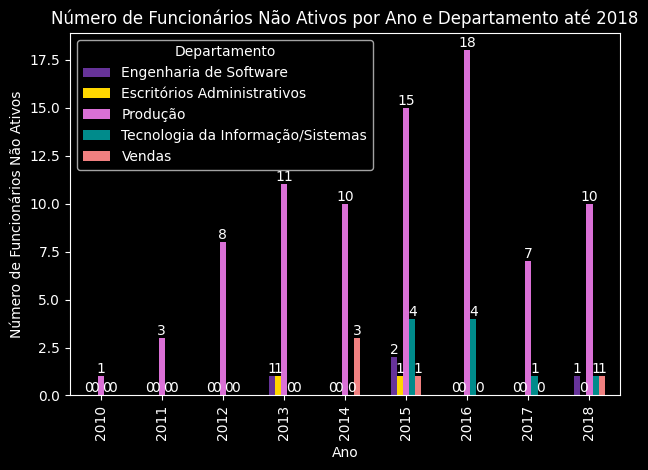

In [ ]:
# Defina uma paleta de cores personalizada para representar os departamentos
paleta_cores = {
    'Produção': 'orchid',
    'Tecnologia da Informação/Sistemas': 'darkcyan',
    'Engenharia de Software': 'rebeccapurple',
    'Escritórios Administrativos': 'gold',
    'Vendas': 'lightcoral',
    'Escritório Executivo': 'lightskyblue'
}

# Filtrar os funcionários que não estão ativos na empresa e cuja data de desligamento é até 2018
funcionarios_nao_ativos = df_rh[(df_rh['Status_Emprego'] != 'Ativo') & (df_rh['Data_de_Desligamento'].dt.year <= 2018)]

# Agrupar por ano e departamento, contando o número de funcionários
contagem_ano_departamento = funcionarios_nao_ativos.groupby([funcionarios_nao_ativos['Data_de_Desligamento'].dt.year, 'Departamento'])['Nome_do_Funcionário'].count()

# Desagrupe os dados usando unstack
contagem_ano_departamento = contagem_ano_departamento.unstack()

# Criar a visualização em barras não empilhadas
ax = contagem_ano_departamento.plot(kind='bar', stacked=False, color=[paleta_cores.get(departamento, 'gray') for departamento in contagem_ano_departamento.columns])

plt.xlabel('Ano')
plt.ylabel('Número de Funcionários Não Ativos')
plt.title('Número de Funcionários Não Ativos por Ano e Departamento até 2018')

# Adicione os valores acima de cada barra
for i in ax.containers:
    ax.bar_label(i)

# Adicione a legenda
plt.legend(title='Departamento')

# Exibir o gráfico
plt.tight_layout()
plt.show()


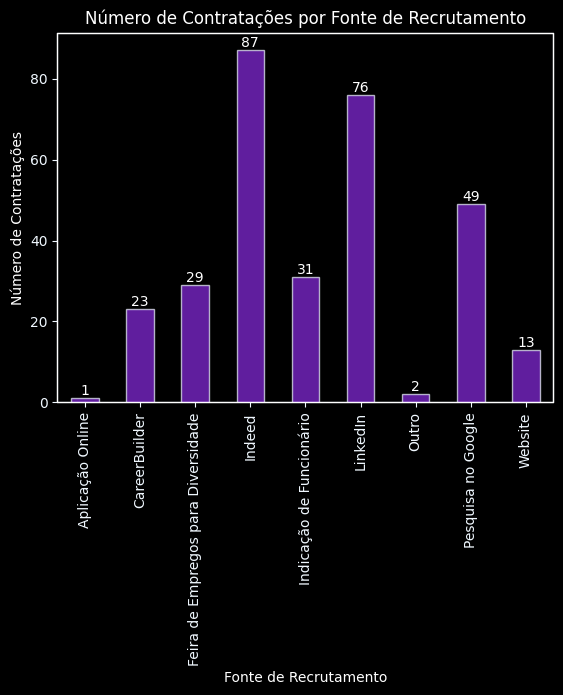

In [ ]:
# Conte o número de ocorrências em cada grupo
contagem_recrutamento = df_rh.groupby('Fonte_Recrutamento')['ID_Funcionário'].count()

# Defina um estilo de plotagem, se desejar
plt.style.use('dark_background')

# Crie um gráfico de barras para exibir as contagens de recrutamento
ax = contagem_recrutamento.plot(kind='bar', color =['blueviolet'], edgecolor= 'aliceblue', alpha=0.7)

# Configure rótulos e título
plt.title("Número de Contratações por Fonte de Recrutamento")
plt.xlabel("Fonte de Recrutamento")
plt.ylabel("Número de Contratações")

# Adicione os valores no topo de cada barra
for i, v in enumerate(contagem_recrutamento):
    ax.text(i, v, str(v), ha='center', va='bottom')
    
# Adicionar uma borda colorida ao redor do gráfico (por exemplo, cor preta)
ax.patch.set_edgecolor('aliceblue')
ax.patch.set_linewidth(1)
    
# Configuração de cores dos rótulos nos eixos x e y
plt.tick_params(axis='x', colors='aliceblue')
plt.tick_params(axis='y', colors='aliceblue')
    
# Exiba o gráfico
plt.show()

In [ ]:
df_rh.iloc[:3, :]

,Nome_do_Funcionário,ID_Funcionário,Casado,ID_Estado_Civil,ID_Gênero,ID_Status_Funcionário,ID_Departamento,ID_Pontuação_Performance,ID_Feira_Diversidade,Salário,...,Nome_Gerente,ID_Gerente,Fonte_Recrutamento,Pontuação_Performance,Pesquisa_Engajamento,Satisfação_Funcionário,Contagem_Projetos_Especiais,Data_Última_Avaliação,Dias_Atraso_30_Dias,Faltas
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Supera,4.60,5,0,17/01/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Atende Plenamente,4.96,3,6,24/02/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Atende Plenamente,3.02,3,0,15/05/2012,0,3


In [ ]:
# Mapear as categorias de Pontuação_Performance para valores numéricos
pontuacao_mapping = {
    'Supera': 4,
    'Atende Plenamente': 3,
    'Necessita de Melhoria': 2,
    'Plano de Melhoria de Desempenho': 1
}

# Aplicar o mapeamento ao DataFrame
df_rh['Pontuação_Numérica'] = df_rh['Pontuação_Performance'].map(pontuacao_mapping)

# Classificar o DataFrame pelo desempenho em ordem decrescente
df_rh_sorted = df_rh.sort_values(by=['Pontuação_Numérica', 'Data_de_Admissão'], ascending=[False, False])

# Selecione as 10 melhores (maior pontuação, data de admissão mais recente)
top_10 = df_rh_sorted.head(10)

# Selecione as 10 piores (menor pontuação, data de admissão mais antiga)
bottom_10 = df_rh_sorted.tail(10)

# Crie uma tabela para os 10 melhores e outra para os 10 piores
df_tabela_top_10 = top_10[['Nome_do_Funcionário', 'Pontuação_Performance', 'Data_de_Admissão']]
df_tabela_bottom_10 = bottom_10[['Nome_do_Funcionário', 'Pontuação_Performance', 'Data_de_Admissão']]

df_tabela_top_10.reset_index(drop=True)
df_tabela_bottom_10.reset_index(drop=True)

# Exiba as tabelas
print("10 Melhores Desempenhos: \n")
df_tabela_top_10.head(10)



10 Melhores Desempenhos: 



,Nome_do_Funcionário,Pontuação_Performance,Data_de_Admissão
16,"Beak, Kimberly",Supera,2016-07-21
51,"Clukey, Elijian",Supera,2016-07-06
36,"Candie, Calvin",Supera,2016-01-28
12,"Barbossa, Hector",Supera,2014-11-10
220,"Petrowsky, Thelma",Supera,2014-11-10
106,"Girifalco, Evelyn",Supera,2014-09-29
257,"Smith, Joe",Supera,2014-09-29
22,"Billis, Helen",Supera,2014-07-07
145,"Johnston, Yen",Supera,2014-07-07
274,"Szabo, Andrew",Supera,2014-07-07


In [ ]:
print("\n10 Piores Desempenhos:")
df_tabela_bottom_10.head(10)


10 Piores Desempenhos:


,Nome_do_Funcionário,Pontuação_Performance,Data_de_Admissão
95,"Forrest, Alex",Plano de Melhoria de Desempenho,2014-09-29
69,"Desimone, Carl",Plano de Melhoria de Desempenho,2014-07-07
83,"Erilus, Angela",Plano de Melhoria de Desempenho,2014-07-07
267,"Stansfield, Norman",Plano de Melhoria de Desempenho,2014-05-12
205,"O'hare, Lynn",Plano de Melhoria de Desempenho,2014-03-31
72,"Dietrich, Jenna",Plano de Melhoria de Desempenho,2012-02-20
263,"Sparks, Taylor",Plano de Melhoria de Desempenho,2012-02-20
188,"Miller, Ned",Plano de Melhoria de Desempenho,2011-08-15
112,"Gonzalez, Juan",Plano de Melhoria de Desempenho,2010-04-26
307,"Ybarra, Catherine",Plano de Melhoria de Desempenho,2008-09-02


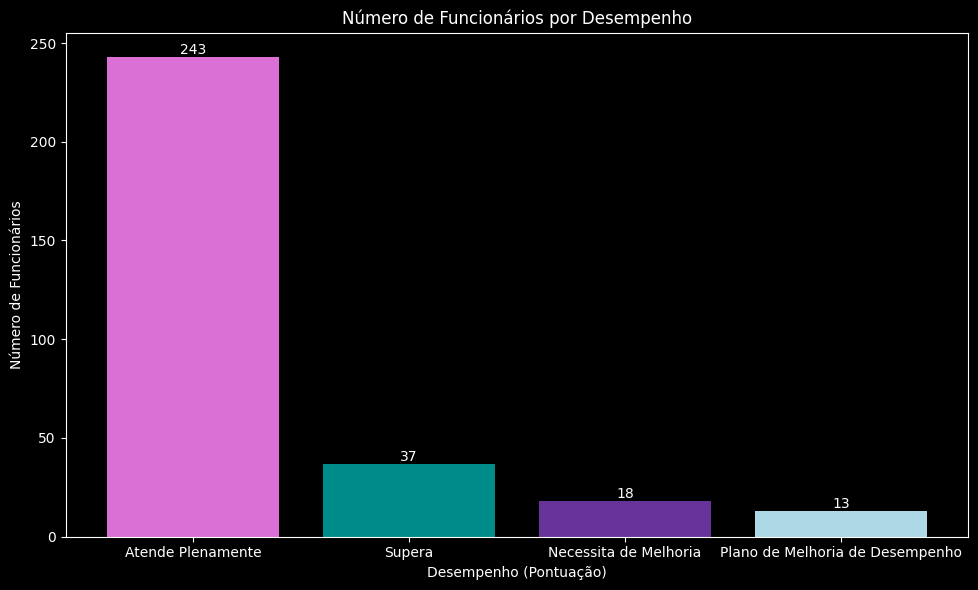

In [ ]:
# Classificar o DataFrame pelo desempenho em ordem decrescente
df_rh_sorted = df_rh.sort_values(by='Pontuação_Performance', ascending=False)

# Contar quantos funcionários têm o mesmo desempenho
contagem_desempenho = df_rh_sorted['Pontuação_Performance'].value_counts()

# Defina as cores correspondentes a cada categoria
colors = {
    'Supera': 'darkcyan',
    'Atende Plenamente': 'orchid',
    'Necessita de Melhoria': 'rebeccapurple',
    'Plano de Melhoria de Desempenho': 'lightblue'
}

# Crie um gráfico de barras para visualizar a contagem de desempenho
plt.figure(figsize=(10, 6))
plt.bar(contagem_desempenho.index, contagem_desempenho.values, color=[colors[p] for p in contagem_desempenho.index])

# Adicione rótulos e título
plt.xlabel('Desempenho (Pontuação)')
plt.ylabel('Número de Funcionários')
plt.title('Número de Funcionários por Desempenho')

# Adicionar os valores nas barras
for i, v in enumerate(contagem_desempenho):
    plt.text(i, v, f"{v:.0f}", ha='center', va='bottom')

# Exiba o gráfico
plt.tight_layout()
plt.show()

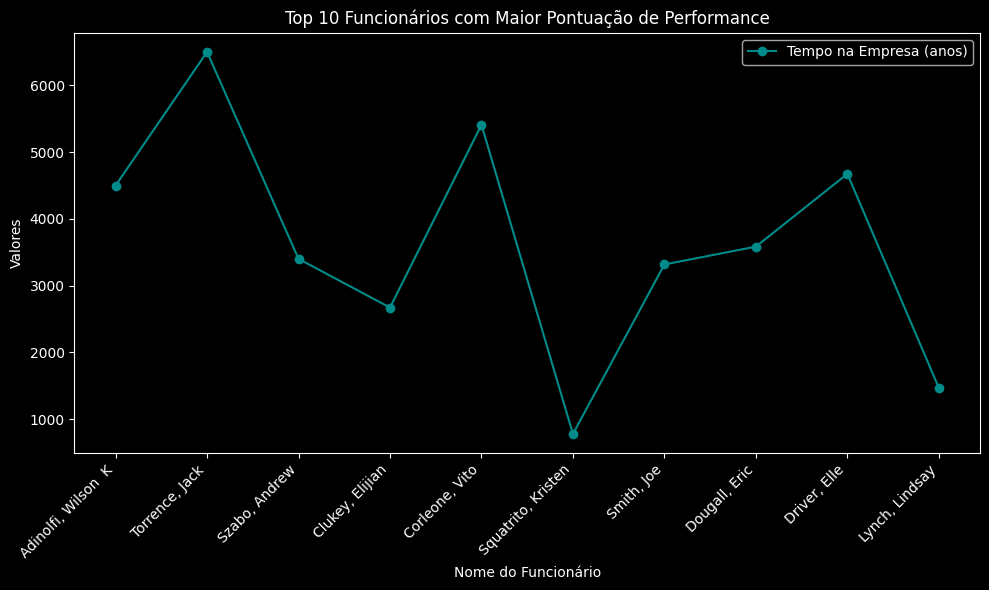

In [ ]:
# Classifique o DataFrame pelo engajamento em ordem decrescente
df_rh_sorted = df_rh.sort_values(by='Pontuação_Performance', ascending=False)

# Selecione os 10 funcionários com maior pontuação de performance
top_10_performance = df_rh_sorted.head(10)

# Crie uma figura para o gráfico
plt.figure(figsize=(10, 6))

# Defina cores personalizadas
colors = ['orchid', 'darkcyan', 'rebeccapurple']

# Crie um gráfico de linhas empilhadas
index = np.arange(len(top_10_performance))
plt.plot(index, top_10_performance['Tempo_na_Empresa'], color=colors[1], label='Tempo na Empresa (anos)', marker='o')
#plt.plot(index, top_10_performance['Contagem_Projetos_Especiais'], color=colors[2], label='Projetos Especiais', marker='o')

# Adicione rótulos e título
plt.xlabel('Nome do Funcionário')
plt.ylabel('Valores')
plt.title('Top 10 Funcionários com Maior Pontuação de Performance')

# Adicione a legenda
plt.legend()

# Personalize os rótulos do eixo X com os nomes dos funcionários
plt.xticks(index, top_10_performance['Nome_do_Funcionário'], rotation=45, ha='right')

# Exiba o gráfico
plt.tight_layout()
plt.show()


In [ ]:
df_rh.iloc[:,20:40]

,Raça,Data_de_Admissão,Data_de_Desligamento,Motivo_Desligamento,Status_Emprego,Departamento,Nome_Gerente,ID_Gerente,Fonte_Recrutamento,Pontuação_Performance,Pesquisa_Engajamento,Satisfação_Funcionário,Contagem_Projetos_Especiais,Data_Última_Avaliação,Dias_Atraso_30_Dias,Faltas,Tempo_na_Empresa,Pontuação_Numérica
0,Branco,2011-07-05,2023-10-29 19:47:18.640976,Não se aplica - Ainda empregado,Ativo,Produção,Michael Albert,22.0,LinkedIn,Supera,4.60,5,0,17/01/2019,0,1,4499,4
1,Branco,2015-03-30,2016-06-16 00:00:00.000000,Mudança de carreira,Demissão Voluntária,Tecnologia da Informação/Sistemas,Simon Roup,4.0,Indeed,Atende Plenamente,4.96,3,6,24/02/2016,0,17,444,3
2,Branco,2011-07-05,2012-09-24 00:00:00.000000,Horas de trabalho,Demissão Voluntária,Produção,Kissy Sullivan,20.0,LinkedIn,Atende Plenamente,3.02,3,0,15/05/2012,0,3,447,3
3,Branco,2008-01-07,2023-10-29 19:47:18.640976,Não se aplica - Ainda empregado,Ativo,Produção,Elijiah Gray,16.0,Indeed,Atende Plenamente,4.84,5,0,03/01/2019,0,15,5774,3
4,Branco,2011-07-11,2016-09-06 00:00:00.000000,Retorno à escola,Demissão Voluntária,Produção,Webster Butler,39.0,Pesquisa no Google,Atende Plenamente,5.00,4,0,01/02/2016,0,2,1884,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Branco,2014-07-07,2023-10-29 19:47:18.640976,Não se aplica - Ainda empregado,Ativo,Produção,Kissy Sullivan,20.0,LinkedIn,Atende Plenamente,4.07,4,0,28/02/2019,0,13,3401,3
307,Asiático,2008-09-02,2015-09-29 00:00:00.000000,Outra posição,Demissão Voluntária,Produção,Brannon Miller,12.0,Pesquisa no Google,Plano de Melhoria de Desempenho,3.20,2,0,02/09/2015,5,4,2583,1
308,Branco,2010-04-10,2023-10-29 19:47:18.640976,Não se aplica - Ainda empregado,Ativo,Tecnologia da Informação/Sistemas,Janet King,2.0,Indicação de Funcionário,Supera,4.60,5,6,21/02/2019,0,16,4950,4
309,Branco,2015-03-30,2023-10-29 19:47:18.640976,Não se aplica - Ainda empregado,Ativo,Tecnologia da Informação/Sistemas,Simon Roup,4.0,Indicação de Funcionário,Atende Plenamente,5.00,3,5,01/02/2019,0,11,3135,3


In [ ]:
df_rh.columns

Index(['Nome_do_Funcionário', 'ID_Funcionário', 'Casado', 'ID_Estado_Civil',
       'ID_Gênero', 'ID_Status_Funcionário', 'ID_Departamento',
       'ID_Pontuação_Performance', 'ID_Feira_Diversidade', 'Salário',
       'Desligado', 'ID_Cargo', 'Cargo', 'Estado', 'CEP', 'Data_de_Nascimento',
       'Gênero', 'Estado_Civil', 'Nacionalidade', 'Hispano_Latino', 'Raça',
       'Data_de_Admissão', 'Data_de_Desligamento', 'Motivo_Desligamento',
       'Status_Emprego', 'Departamento', 'Nome_Gerente', 'ID_Gerente',
       'Fonte_Recrutamento', 'Pontuação_Performance', 'Pesquisa_Engajamento',
       'Satisfação_Funcionário', 'Contagem_Projetos_Especiais',
       'Data_Última_Avaliação', 'Dias_Atraso_30_Dias', 'Faltas',
       'Tempo_na_Empresa', 'Pontuação_Numérica'],
      dtype='object')

In [ ]:
df_rh.iloc[:,20:30]

,Raça,Data_de_Admissão,Data_de_Desligamento,Motivo_Desligamento,Status_Emprego,Departamento,Nome_Gerente,ID_Gerente,Fonte_Recrutamento,Pontuação_Performance
0,Branco,2011-07-05,2023-10-29 19:47:18.640976,Não se aplica - Ainda empregado,Ativo,Produção,Michael Albert,22.0,LinkedIn,Supera
1,Branco,2015-03-30,2016-06-16 00:00:00.000000,Mudança de carreira,Demissão Voluntária,Tecnologia da Informação/Sistemas,Simon Roup,4.0,Indeed,Atende Plenamente
2,Branco,2011-07-05,2012-09-24 00:00:00.000000,Horas de trabalho,Demissão Voluntária,Produção,Kissy Sullivan,20.0,LinkedIn,Atende Plenamente
3,Branco,2008-01-07,2023-10-29 19:47:18.640976,Não se aplica - Ainda empregado,Ativo,Produção,Elijiah Gray,16.0,Indeed,Atende Plenamente
4,Branco,2011-07-11,2016-09-06 00:00:00.000000,Retorno à escola,Demissão Voluntária,Produção,Webster Butler,39.0,Pesquisa no Google,Atende Plenamente
...,...,...,...,...,...,...,...,...,...,...
306,Branco,2014-07-07,2023-10-29 19:47:18.640976,Não se aplica - Ainda empregado,Ativo,Produção,Kissy Sullivan,20.0,LinkedIn,Atende Plenamente
307,Asiático,2008-09-02,2015-09-29 00:00:00.000000,Outra posição,Demissão Voluntária,Produção,Brannon Miller,12.0,Pesquisa no Google,Plano de Melhoria de Desempenho
308,Branco,2010-04-10,2023-10-29 19:47:18.640976,Não se aplica - Ainda empregado,Ativo,Tecnologia da Informação/Sistemas,Janet King,2.0,Indicação de Funcionário,Supera
309,Branco,2015-03-30,2023-10-29 19:47:18.640976,Não se aplica - Ainda empregado,Ativo,Tecnologia da Informação/Sistemas,Simon Roup,4.0,Indicação de Funcionário,Atende Plenamente


In [ ]:
df_rh['Departamento'].unique()

array(['Produção', 'Tecnologia da Informação/Sistemas',
       'Engenharia de Software', 'Escritórios Administrativos', 'Vendas',
       'Escritório Executivo'], dtype=object)

## "Análise de Dados e Insights sobre Recrutamento, Permanência e Desempenho dos Colaboradores"

### Número de Funcionários Ativos por Departamento

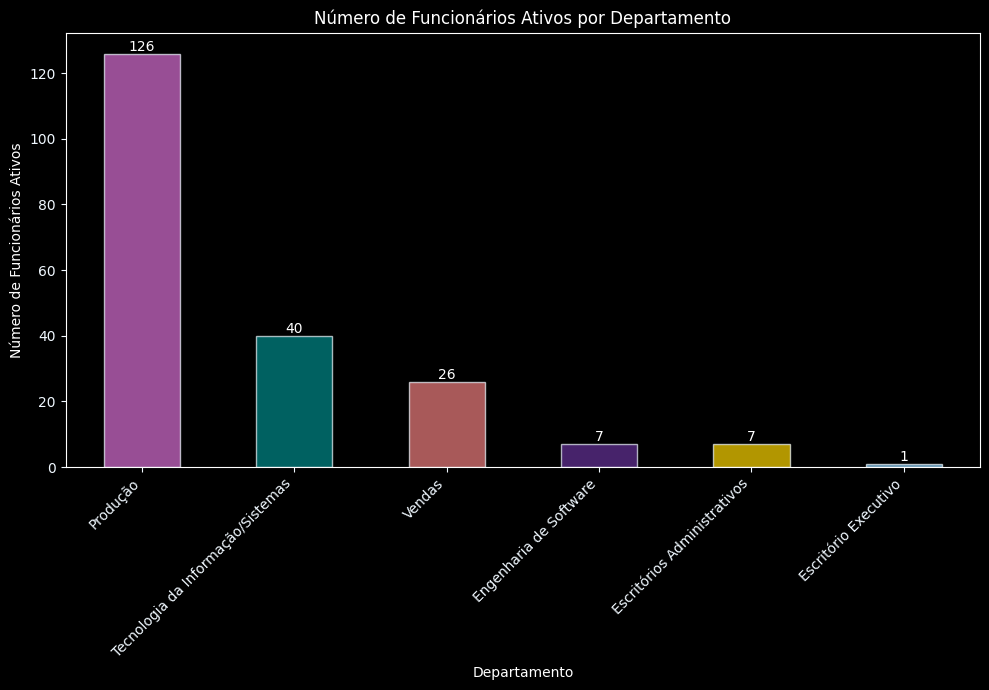

In [ ]:
# Filtrar o DataFrame para selecionar apenas funcionários ativos
funcionarios_ativos = df_rh[df_rh['Status_Emprego'] == 'Ativo']

# Contar o número de funcionários ativos por departamento
departamento_counts = funcionarios_ativos['Departamento'].value_counts()

# Defina uma paleta de cores personalizada para representar os departamentos
paleta_cores = {
    'Produção' : 'orchid',
    'Tecnologia da Informação/Sistemas': 'darkcyan',
    'Engenharia de Software': 'rebeccapurple',
    'Escritórios Administrativos': 'gold',
    'Vendas': 'lightcoral',
    'Escritório Executivo': 'lightskyblue'
}

# Mapear as cores com base nos departamentos
cores_departamentos = [paleta_cores[departamento] for departamento in departamento_counts.index]

# Criar um gráfico de barras com bordas
plt.figure(figsize=(10, 7))  # Defina o tamanho da figura
departamento_counts.plot(kind='bar', color=cores_departamentos, alpha=0.7, edgecolor='aliceblue')

# Configure rótulos e título
plt.title("Número de Funcionários Ativos por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Número de Funcionários Ativos")

# Adicione os valores no topo de cada barra
for i, v in enumerate(departamento_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')


# Rode os rótulos para melhor visualização
plt.xticks(rotation=45, ha='right')

# Configuração de cores dos rótulos nos eixos x e y
plt.tick_params(axis='x', colors='aliceblue')
plt.tick_params(axis='y', colors='aliceblue')

# Exiba o gráfico
plt.tight_layout()
plt.show()


### Número de Pessoas por Departamento e Fonte de Recrutamento?

<Figure size 1500x800 with 0 Axes>

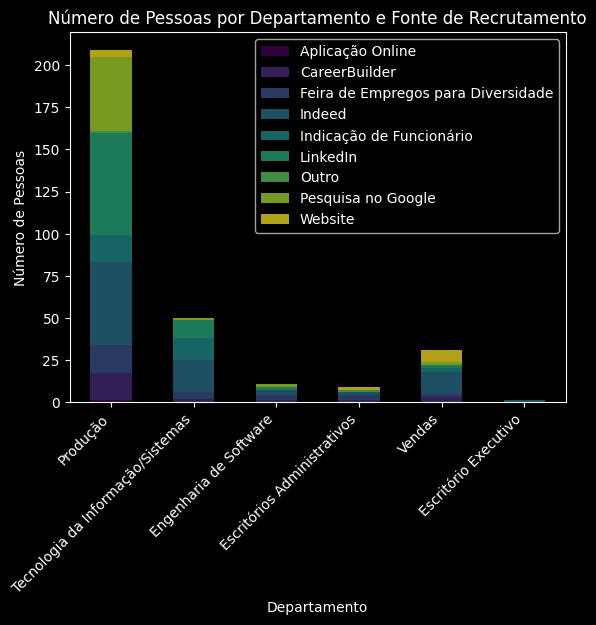

In [ ]:
# Ordene os departamentos na ordem desejada
ordem_departamentos = [
    'Produção',
    'Tecnologia da Informação/Sistemas',
    'Engenharia de Software',
    'Escritórios Administrativos',
    'Vendas',
    'Escritório Executivo'
]


#Conte o número de ocorrências em cada grupo
contagem_area_recrutamento = contagem_area_recrutamento.reindex(ordem_departamentos)

# Crie uma figura maior
plt.figure(figsize=(15, 8))

# Crie um gráfico de barras empilhadas para exibir as contagens de recrutamento por departamento
ax = contagem_area_recrutamento.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.7)

# Configure rótulos e título
plt.title("Número de Pessoas por Departamento e Fonte de Recrutamento")
plt.xlabel("Departamento")
plt.ylabel("Número de Pessoas")

# Adicione a legenda à esquerda do gráfico
plt.legend(title="Fonte de Recrutamento", loc="upper left")

# Rode os rótulos para melhor visualização
plt.xticks(rotation=45, ha='right')

# Ajuste o tamanho da legenda para ficar menor
leg = ax.legend()
leg.set_bbox_to_anchor((1, 1))  # Ajusta a posição da legenda

# Exiba o gráfico
plt.show()

### Número de Pessoas por Departamento ao Longo dos Anos

C:\Users\stefa\AppData\Local\Temp\ipykernel_20504\667523817.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_funcionarios_ativos['Ano_Admissao'] = df_funcionarios_ativos['Data_de_Admissão'].dt.year


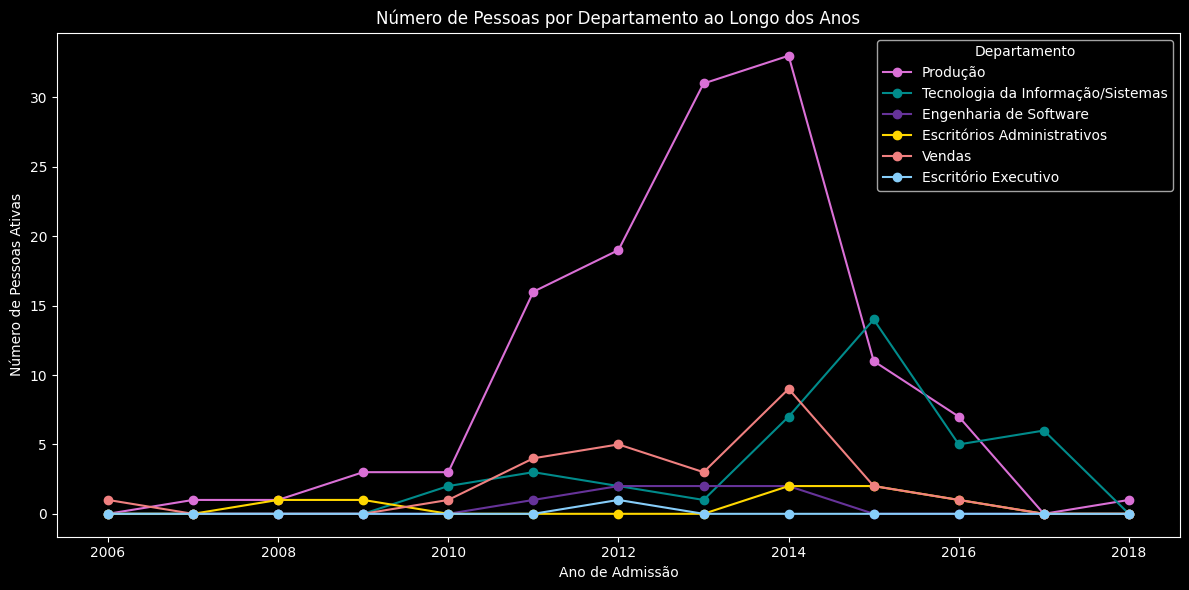

In [ ]:
# Filtrar o DataFrame para selecionar apenas funcionários ativos
df_funcionarios_ativos = df_rh[df_rh['Status_Emprego'] == 'Ativo']

# Extrair o ano de admissão da coluna 'Data_de_Admissão'
df_funcionarios_ativos['Ano_Admissao'] = df_funcionarios_ativos['Data_de_Admissão'].dt.year

# Contar o número de funcionários ativos por departamento e ano
contagem_por_ano_departamento = funcionarios_ativos.groupby(['Ano_Admissao', 'Departamento'])['ID_Departamento'].count().unstack().fillna(0)

# Defina uma paleta de cores personalizada
paleta_cores = {
    'Produção': 'orchid',
    'Tecnologia da Informação/Sistemas': 'darkcyan',
    'Engenharia de Software': 'rebeccapurple',
    'Escritórios Administrativos': 'gold',
    'Vendas': 'lightcoral',
    'Escritório Executivo': 'lightskyblue'
}

# Crie uma figura maior
plt.figure(figsize=(12, 6))

# Crie um gráfico de linhas para cada departamento com cores personalizadas
for departamento, cor in paleta_cores.items():
    plt.plot(contagem_por_ano_departamento.index, contagem_por_ano_departamento[departamento], label=departamento, color=cor, marker='o')

# Configure rótulos e título
plt.title("Número de Pessoas por Departamento ao Longo dos Anos")
plt.xlabel("Ano de Admissão")
plt.ylabel("Número de Pessoas Ativas")

# Adicione a legenda
plt.legend(title="Departamento")

# Exiba o gráfico
plt.tight_layout()
plt.show()

### Tipos de Demissões no Departamento de Escritórios Administrativos

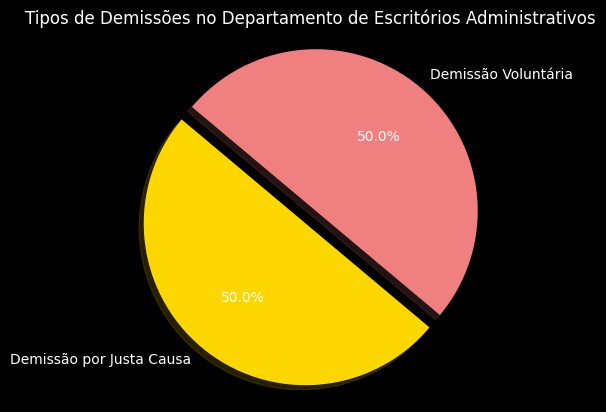

In [ ]:
# Filtre os dados para obter demissões no departamento de Escritórios Administrativos
demitidos_escritorios = df_rh[(df_rh['Departamento'] == 'Escritórios Administrativos') & (df_rh['Status_Emprego'].str.contains('Demissão.*'))]

# Calcule a contagem de tipos de demissões
contagem_tipos_demissoes = demitidos_escritorios['Status_Emprego'].value_counts()

# Se não houver demissões, não crie o gráfico de pizza
if not contagem_tipos_demissoes.empty:
    # Rótulos para a legenda
    labels = contagem_tipos_demissoes.index
    sizes = contagem_tipos_demissoes.values
    
    # Cores para os setores da pizza
    colors = ['gold', 'lightcoral']
    
    # Destaque o primeiro setor (Demissão Voluntária)
    explode = (0.1, 0)  # Ajuste o valor de explode conforme necessário
    
    # Crie o gráfico de pizza
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')  # Assegure-se de que o gráfico seja uma circunferência.
    plt.title("Tipos de Demissões no Departamento de Escritórios Administrativos")
    
    # Exiba o gráfico
    plt.show()
else:
    print("Não há demissões no departamento de Escritórios Administrativos.")



### Tempo Médio de Permanência na Empresa

Média do tempo que os funcionários passaram na empresa: 2992.88 dias ou 8 anos


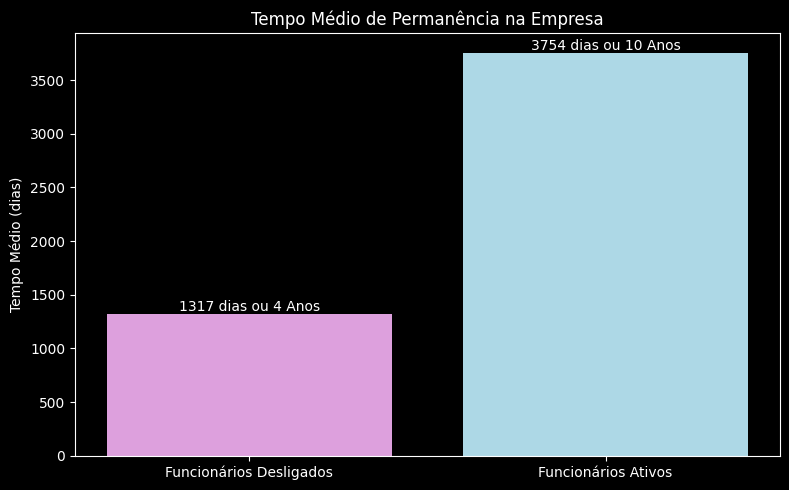

In [ ]:
# Preencher valores vazios na coluna de desligamento com a data atual
data_atual = datetime.now()
df_recrutamento = df_rh.copy()  # Crie um novo DataFrame para df_recrutamento
df_recrutamento['Data_de_Desligamento'] = pd.to_datetime(df_recrutamento['Data_de_Desligamento'], errors='coerce').fillna(data_atual)

df_recrutamento['Data_de_Admissão'] = pd.to_datetime(df_recrutamento['Data_de_Admissão'], errors='coerce')
df_recrutamento['Tempo_na_Empresa'] = (df_recrutamento['Data_de_Desligamento'] - df_recrutamento['Data_de_Admissão']).dt.days


# Passo 4: Calcular a média do tempo de permanência na empresa
media_tempo_na_empresa = df_recrutamento['Tempo_na_Empresa'].mean()

# Imprimir a média
print(f'Média do tempo que os funcionários passaram na empresa: {media_tempo_na_empresa:.2f} dias ou {(media_tempo_na_empresa/365):.0f} anos')

# Filtrar funcionários que já foram embora
funcionarios_desligados = df_rh[df_rh['Status_Emprego'] != 'Ativo']

# Filtrar funcionários que ainda estão na empresa
funcionarios_ativos = df_rh[df_rh['Status_Emprego'] == 'Ativo']

# Calcular o tempo médio dos funcionários desligados e ativos
media_tempo_desligados = funcionarios_desligados['Tempo_na_Empresa'].mean()
media_tempo_ativos = funcionarios_ativos['Tempo_na_Empresa'].mean()

# Preparar os dados para o gráfico
categorias = ['Funcionários Desligados', 'Funcionários Ativos']
tempos_medios = [media_tempo_desligados, media_tempo_ativos]

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(categorias, tempos_medios, color=['plum', 'lightblue'])

# Adicionar rótulos e título
plt.title("Tempo Médio de Permanência na Empresa")
plt.ylabel("Tempo Médio (dias)")

# Adicionar os valores nas barras
for i, v in enumerate(tempos_medios):
    plt.text(i, v, f"{(v):.0f} dias ou {(v/365):.0f} Anos", ha='center', va='bottom')

# Exibir o gráfico
plt.tight_layout()
plt.show()

#### Número de Funcionários por Desempenho

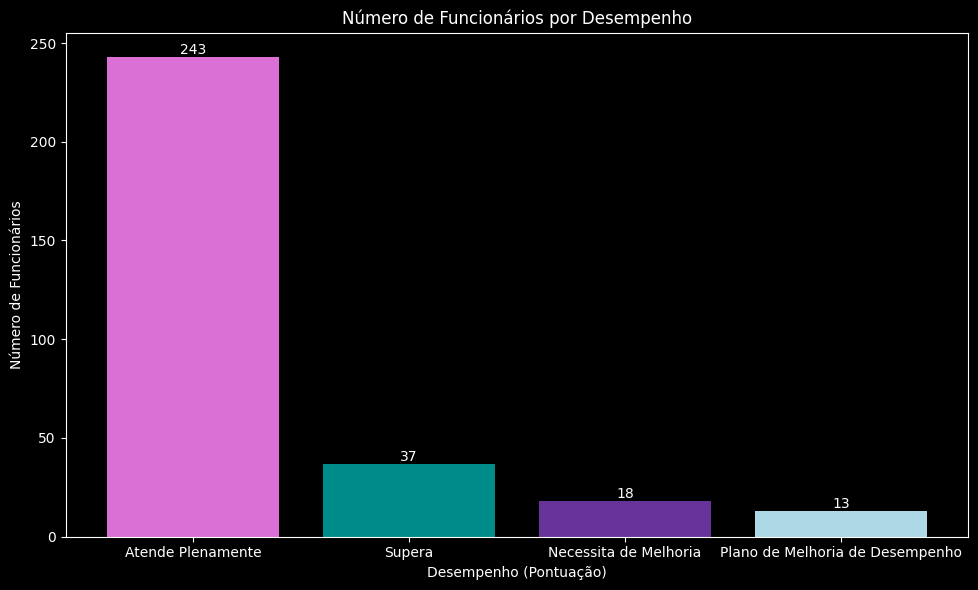

In [ ]:
# Classificar o DataFrame pelo desempenho em ordem decrescente
df_rh_sorted = df_rh.sort_values(by='Pontuação_Performance', ascending=False)

# Contar quantos funcionários têm o mesmo desempenho
contagem_desempenho = df_rh_sorted['Pontuação_Performance'].value_counts()

# Defina as cores correspondentes a cada categoria
colors = {
    'Supera': 'darkcyan',
    'Atende Plenamente': 'orchid',
    'Necessita de Melhoria': 'rebeccapurple',
    'Plano de Melhoria de Desempenho': 'lightblue'
}

# Crie um gráfico de barras para visualizar a contagem de desempenho
plt.figure(figsize=(10, 6))
plt.bar(contagem_desempenho.index, contagem_desempenho.values, color=[colors[p] for p in contagem_desempenho.index])

# Adicione rótulos e título
plt.xlabel('Desempenho (Pontuação)')
plt.ylabel('Número de Funcionários')
plt.title('Número de Funcionários por Desempenho')

# Adicionar os valores nas barras
for i, v in enumerate(contagem_desempenho):
    plt.text(i, v, f"{v:.0f}", ha='center', va='bottom')

# Exiba o gráfico
plt.tight_layout()
plt.show()

### Distribuição do Nível de Satisfação dos Funcionários Ativos

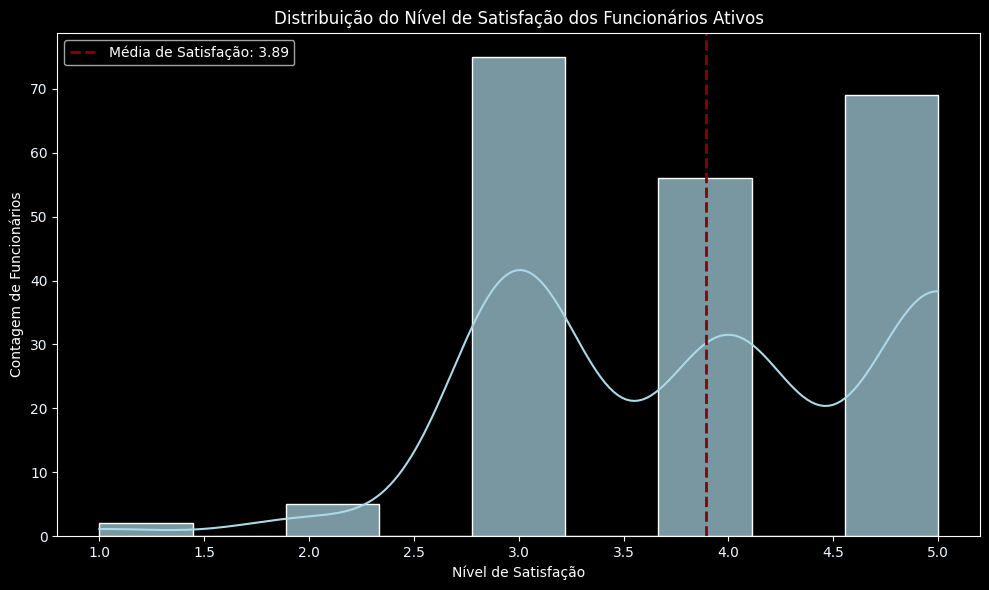

Média de Satisfação dos Funcionários Ativos: 3.89


In [ ]:
# Filtrar o DataFrame para selecionar apenas funcionários ativos
funcionarios_ativos = df_rh[df_rh['Status_Emprego'] == 'Ativo']

# Defina o tamanho da figura
plt.figure(figsize=(10, 6))


# Crie um gráfico de distribuição (histograma) usando Seaborn
sns.histplot(funcionarios_ativos['Satisfação_Funcionário'], kde=True, color= 'lightblue', alpha=0.7)

# Configure rótulos e título
plt.title("Distribuição do Nível de Satisfação dos Funcionários Ativos")
plt.xlabel("Nível de Satisfação")
plt.ylabel("Contagem de Funcionários")

# Calcula a média da satisfação dos funcionários ativos
media_satisfacao = funcionarios_ativos['Satisfação_Funcionário'].mean()

# Adiciona a média ao gráfico
plt.axvline(media_satisfacao, color='darkred', linestyle='dashed', linewidth=2, label=f'Média de Satisfação: {media_satisfacao:.2f}')

# Adiciona uma legenda ao gráfico
plt.legend(loc='upper left')

# Configuração de cores dos rótulos nos eixos x e y
plt.tick_params(axis='x', colors='aliceblue')
plt.tick_params(axis='y', colors='aliceblue')

# Exiba o gráfico
plt.tight_layout()
plt.show()

#Exiba a média
print(f"Média de Satisfação dos Funcionários Ativos: {media_satisfacao:.2f}")


### Tempo de Serviço dos 10 Funcionários com Maior Pontuação de Performance

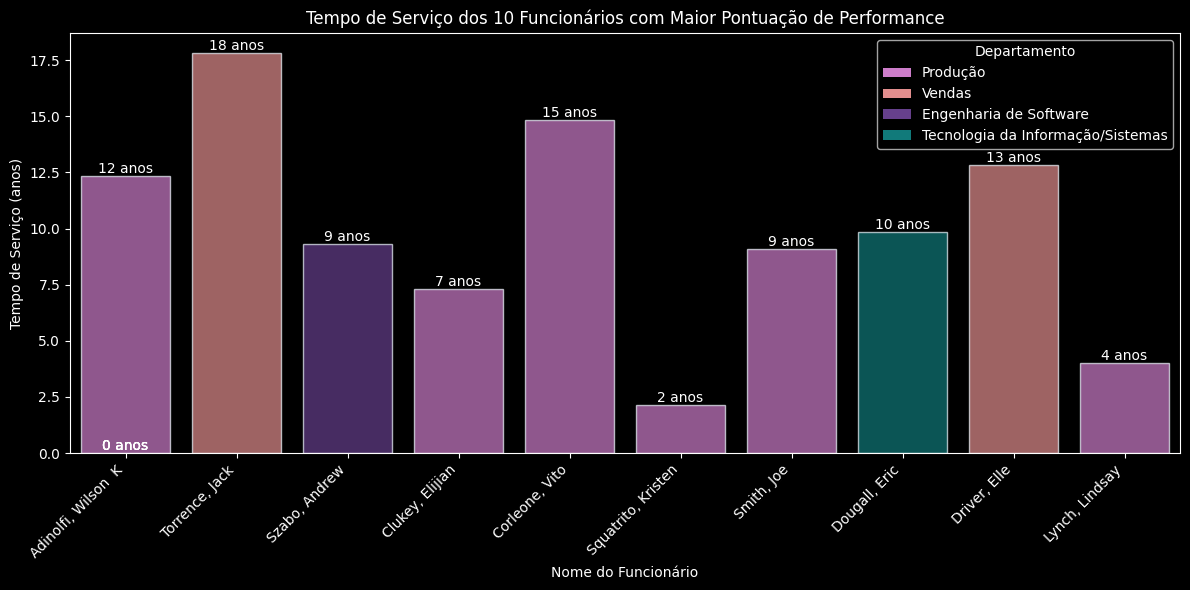

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Classifique o DataFrame pelo engajamento em ordem decrescente
df_rh_sorted = df_rh.sort_values(by='Pontuação_Performance', ascending=False)

# Selecione os 10 funcionários com maior pontuação de performance
top_10_performance = df_rh_sorted.head(10)

# Preencher valores vazios na coluna de desligamento com a data atual
data_atual = pd.to_datetime('now')

# Criar um novo DataFrame df_recrutamento com os top 10 funcionários
df_recrutamento = top_10_performance.copy()

# Converter as colunas 'Data_de_Desligamento' e 'Data_de_Admissão' para datetime com dayfirst=True
df_recrutamento['Data_de_Desligamento'] = pd.to_datetime(df_recrutamento['Data_de_Desligamento'], format='%d/%m/%Y', dayfirst=True, errors='coerce').fillna(data_atual)
df_recrutamento['Data_de_Admissão'] = pd.to_datetime(df_recrutamento['Data_de_Admissão'], format='%d/%m/%Y', dayfirst=True, errors='coerce')

# Calcular o tempo de empresa em dias
df_recrutamento['Tempo_na_Empresa_Dias'] = (df_recrutamento['Data_de_Desligamento'] - df_recrutamento['Data_de_Admissão']).dt.days

# Calcular o tempo de empresa em anos
df_recrutamento['Tempo_na_Empresa_Anos'] = df_recrutamento['Tempo_na_Empresa_Dias'] / 365

# Crie uma figura para o gráfico
plt.figure(figsize=(12, 6))

# Defina uma paleta de cores personalizada para representar os departamentos
paleta_cores = {
    'Produção': 'orchid',
    'Tecnologia da Informação/Sistemas': 'darkcyan',
    'Engenharia de Software': 'rebeccapurple',
    'Escritórios Administrativos': 'gold',
    'Vendas': 'lightcoral',
    'Escritório Executivo': 'lightskyblue'
}

# Use o Seaborn para criar um gráfico de barras agrupadas
ax = sns.barplot(data=df_recrutamento, x='Nome_do_Funcionário', y='Tempo_na_Empresa_Anos', hue='Departamento', palette=paleta_cores)

# Adicione rótulos e título
plt.xlabel('Nome do Funcionário')
plt.ylabel('Tempo de Serviço (anos)')
plt.title('Tempo de Serviço dos 10 Funcionários com Maior Pontuação de Performance')

# Personalize os rótulos do eixo X com os nomes dos funcionários
plt.xticks(rotation=45, ha='right')

# Adicione os valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} anos', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Adicione bordas às barras
for p in ax.patches:
    p.set_alpha(0.7)
    p.set_edgecolor('aliceblue')

# Exiba o gráfico
plt.tight_layout()
plt.show()


### Salários dos 10 Funcionários com Maior Pontuação de Performance

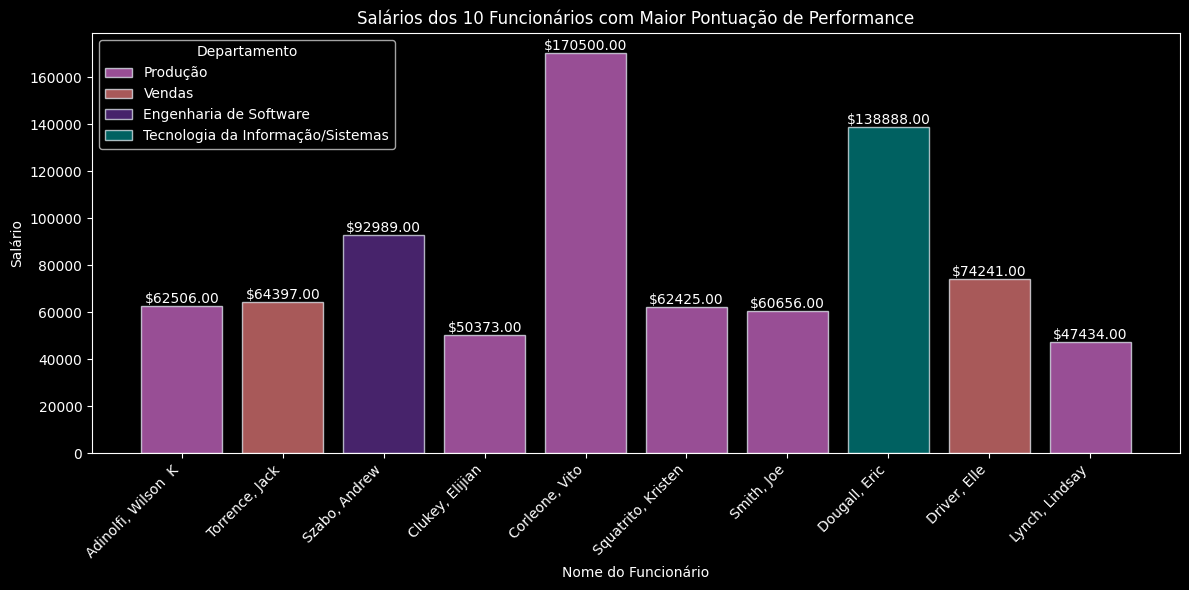

In [ ]:
# Classifique o DataFrame pelo engajamento em ordem decrescente
df_rh_sorted = df_rh.sort_values(by='Pontuação_Performance', ascending=False)

# Selecione os 10 funcionários com maior pontuação de performance
top_10_performance = df_rh_sorted.head(10)

# Crie uma figura para o gráfico
plt.figure(figsize=(12, 6))

# Defina uma paleta de cores personalizada para representar os departamentos
paleta_cores = {
    'Produção': 'orchid',
    'Tecnologia da Informação/Sistemas': 'darkcyan',
    'Engenharia de Software': 'rebeccapurple',
    'Escritórios Administrativos': 'gold',
    'Vendas': 'lightcoral',
    'Escritório Executivo': 'lightskyblue'
}

# Crie um dicionário para rastrear os departamentos já adicionados à legenda
departamentos_adicionados = {}

# Crie um gráfico de barras empilhadas para exibir os salários por departamento
for i, row in top_10_performance.iterrows():
    departamento = row['Departamento']
    if departamento not in departamentos_adicionados:
        plt.bar(row['Nome_do_Funcionário'], row['Salário'], color=paleta_cores.get(departamento, 'gray'), label=departamento, alpha=0.7, edgecolor='aliceblue')
        departamentos_adicionados[departamento] = True
    else:
        plt.bar(row['Nome_do_Funcionário'], row['Salário'], color=paleta_cores.get(departamento, 'gray'), alpha=0.7, edgecolor='aliceblue')

# Adicione rótulos e título
plt.xlabel('Nome do Funcionário')
plt.ylabel('Salário')
plt.title('Salários dos 10 Funcionários com Maior Pontuação de Performance')

# Personalize os rótulos do eixo X com os nomes dos funcionários
plt.xticks(rotation=45, ha='right')

# Adicione a legenda
plt.legend(title='Departamento')

# Adicione os valores nas barras
for i, row in top_10_performance.iterrows():
    plt.annotate(f'${row["Salário"]:.2f}', (row["Nome_do_Funcionário"], row["Salário"]), ha='center', va='bottom')

# Exiba o gráfico
plt.tight_layout()
plt.show()
